In [1]:
from scipy.interpolate import make_interp_spline

import pandas as pd
import glob
from utils import convert_csv_to_graph
from network import get_network_stats
import networkx as nx
import matplotlib.pyplot as plt
import csv
import numpy as np
import seaborn as sns
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d
from utils import smooth
from data import get_MIM_df, get_MIM_df_no_merge

In [2]:
sns.set_style('darkgrid')  # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text
palette = sns.color_palette()


In [3]:
MIM_1_model_df, MIM_1_w25_agent_df = get_MIM_df('1_w=25')
MIM_2_model_df, MIM_2_agent_df = get_MIM_df('2_w=25')



In [4]:
# MIM_2_y1 = MIM_2_model_df['average_opinion_all']
# MIM_2_y2 = MIM_2_model_df['average_opinion_left']
# MIM_2_y3 = MIM_2_model_df['average_opinion_right']

# MIM_1_y1 = MIM_1_model_df['average_opinion_all']
# MIM_1_y2 = MIM_1_model_df['average_opinion_left']
# MIM_1_y3 = MIM_1_model_df['average_opinion_right']


# x = np.linspace(0, 1000, 1000)


# fig, ax = plt.subplots()

# fig.tight_layout()


# spl1 = make_interp_spline(x, MIM_2_y1)
# spl2 = make_interp_spline(x, MIM_2_y2)
# spl3 = make_interp_spline(x, MIM_2_y3)


# ax.plot(x, smooth(MIM_1_y1, 0.98), '--', color='black', alpha=0.5, label="All agents (MIM-1)")
# ax.plot(x, smooth(MIM_1_y2, 0.98), '--', color='blue', alpha=0.5,label=" L-bot followers (MIM-1)")
# ax.plot(x, smooth(MIM_1_y3, 0.98), '--', color='red', alpha=0.5,label="R-bot followers (MIM-1)")

# ax.plot(x, smooth(MIM_2_y1,0.98), '-', color='black', label="All agents (MIM-2)")
# ax.plot(x, smooth(MIM_2_y2,0.98), '-', color='blue', label=" L-bot followers (MIM-2)")
# ax.plot(x, smooth(MIM_2_y3,0.98), '-', color='red', label="R-bot followers (MIM-2)")



# ax.set_xticks(np.arange(0, 1100, 100))
# ax.set_yticks(np.arange(0.0, 1.1, 0.1))
# ax.set_ylim([0, 1])
# ax.set_ylabel('average opinion')
# ax.set_xlabel('simulation periods')


# ax.legend(loc='best',prop={'size': 8})

# # plt.savefig('data/graphs/MIM1_vs_MIM2_op.png')

# # axes[1].plot(x[:200], MIM_2_y1[:200], color='black')
# # axes[1].plot(x[:200], MIM_y2[:200], color='blue')
# # axes[1].plot(x[:200], MIM_y3[:200], color='red')

In [5]:
# fig, ax = plt.subplots()

# MIM_1_y = MIM_1_model_df['average_opinion_reg']
# MIM_2_y = MIM_2_model_df['average_opinion_reg']

# ax.plot(x, smooth(MIM_1_y, 0.98), label='polarization (MIM_2)')
# ax.plot(x, smooth(MIM_2_y, 0.98), label='polarization (MIM_2)')
# ax.legend(loc='best')

# ax.set_ylabel('overall polarization')
# ax.set_xlabel('simulation periods')

# plt.savefig('data/graphs/MIM1_vs_MIM2_misinf.png')


In [6]:
# fig, ax = plt.subplots(figsize=(20,5))
# sns.boxplot(x = MIM_2_agent_df['step'], 
#                 y = MIM_2_agent_df['opinion'], 
#                 ax = ax)




# Evaluation of account banning different W setting (w=1,5,25) 

In [7]:
#---------------------------------------------------------------------------
#                            Average (across 10 simulations)
#---------------------------------------------------------------------------

mim1_w1_mdf, mim1_w1_adf = get_MIM_df('1_w=1')
mim1_w5_mdf, mim1_w5_adf = get_MIM_df('1_w=5')
mim1_w25_mdf, mim1_w25_adf = get_MIM_df('1_w=25')


mim2_w1_mdf,mim2_w1_adf = get_MIM_df('2_w=1')
mim2_w5_mdf,mim2_w5_adf = get_MIM_df('2_w=5')
mim2_w25_mdf,mim2_w25_adf = get_MIM_df('2_w=25')

mim3_w1_mdf,mim3_w1_adf = get_MIM_df('3_w=1')
mim3_w5_mdf,mim3_w5_adf = get_MIM_df('3_w=5')
mim3_w25_mdf,mim3_w25_adf = get_MIM_df('3_w=25')

#---------------------------------------------------------------------------
#                            No merging (10 simulations)
#---------------------------------------------------------------------------

mim1_w1_mdf_nm, mim1_w1_adf_nm = get_MIM_df_no_merge('1_w=1')
mim1_w5_mdf_nm, mim1_w5_adf_nm = get_MIM_df_no_merge('1_w=5')
mim1_w25_mdf_nm, mim1_w25_adf_nm = get_MIM_df_no_merge('1_w=25')


mim2_w1_mdf_nm,mim2_w1_adf_nm = get_MIM_df_no_merge('2_w=1')
mim2_w5_mdf_nm,mim2_w5_adf_nm = get_MIM_df_no_merge('2_w=5')
mim2_w25_mdf_nm,mim2_w25_adf_nm = get_MIM_df_no_merge('2_w=25')

mim3_w1_mdf_nm,mim3_w1_adf_nm = get_MIM_df_no_merge('3_w=1')
mim3_w5_mdf_nm,mim3_w5_adf_nm = get_MIM_df_no_merge('3_w=5')
mim3_w25_mdf_nm,mim3_w25_adf_nm = get_MIM_df_no_merge('3_w=25')


# Box and Whisker plot (3 vs 3)

<Figure size 640x480 with 0 Axes>

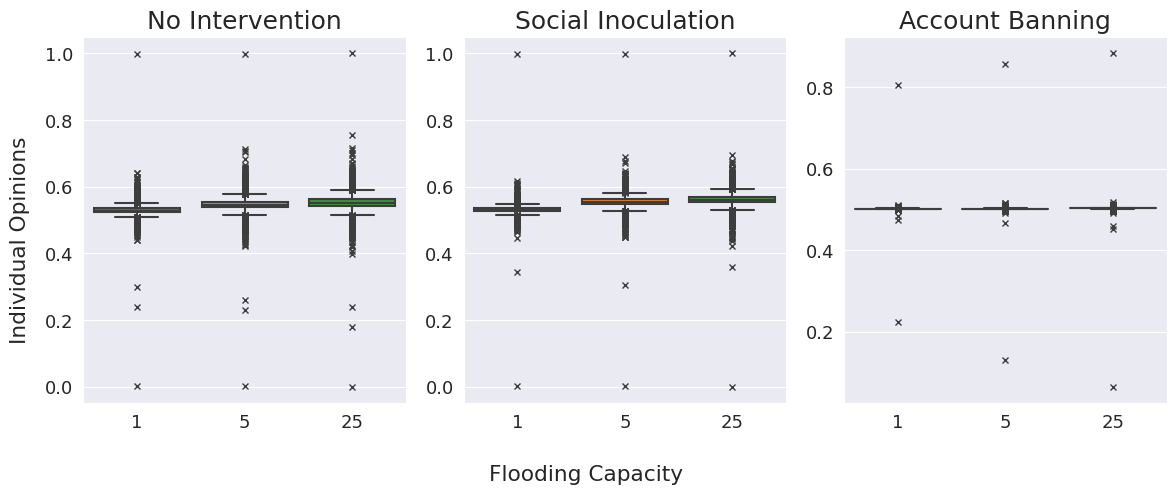

In [8]:
# we need to get a distribution of agent opinions of each experiment
# by working out the average long-run opinion of each agent across 10 experiments

plt.tight_layout()
# TODO: we need to find out the average of agentdf during the last 200 iterations

# We establish the x-axis as w, y axis
# as the distributions of average opinions over the last 200 iterations

num_agent = 1069

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))

ws = [1, 5, 25]

x = sum([[w] * num_agent for w in ws], [])

# TODO: concatenate rows
mim1_y = list(pd.concat([mim1_w1_adf['opinion'][-num_agent:], mim1_w5_adf['opinion'][-num_agent:],mim1_w25_adf['opinion'][-num_agent:],
                         ], axis=0, ignore_index=True, sort=False,))

mim2_y = list(pd.concat([mim2_w1_adf['opinion'][-num_agent:], mim2_w5_adf['opinion'][-num_agent:],mim2_w25_adf['opinion'][-num_agent:],
                         ], axis=0, ignore_index=True, sort=False,))

mim3_y = list(pd.concat([mim3_w1_adf['opinion'][-num_agent:], mim3_w5_adf['opinion'][-num_agent:],mim3_w25_adf['opinion'][-num_agent:],
                         ], axis=0, ignore_index=True, sort=False))


# axes[0].set_ylim(0.4, 0.6)
# axes[1].set_ylim(0.4, 0.6)
# axes[2].set_ylim(0.4, 0.6)

sns.boxplot(x=x, y=mim1_y, ax=axes[0], flierprops={'marker': 'x', }).set_title('No Intervention')
sns.boxplot(x=x, y=mim2_y, ax=axes[2], flierprops={'marker': 'x', }).set_title('Account Banning')
sns.boxplot(x=x, y=mim3_y, ax=axes[1], flierprops={'marker': 'x', }).set_title('Social Inoculation')


fig.supylabel('Individual Opinions')

fig.supxlabel('Flooding Capacity')



plt.tight_layout()


plt.savefig('data/graphs/exp1_op_box.png', dpi=500)


In [9]:

def tsplot(ax, data,**kw):
    x = np.arange(data.shape[1])
    est = np.mean(data, axis=0)
    sd = np.std(data, axis=0)
    cis = (est - sd, est + sd)
    ax.fill_between(x,cis[0],cis[1],alpha=0.2, **kw)
    ax.plot(x,est,**kw)
    ax.margins(x=0)


# Comparison between no intervention (1) and social inoculation (3) 

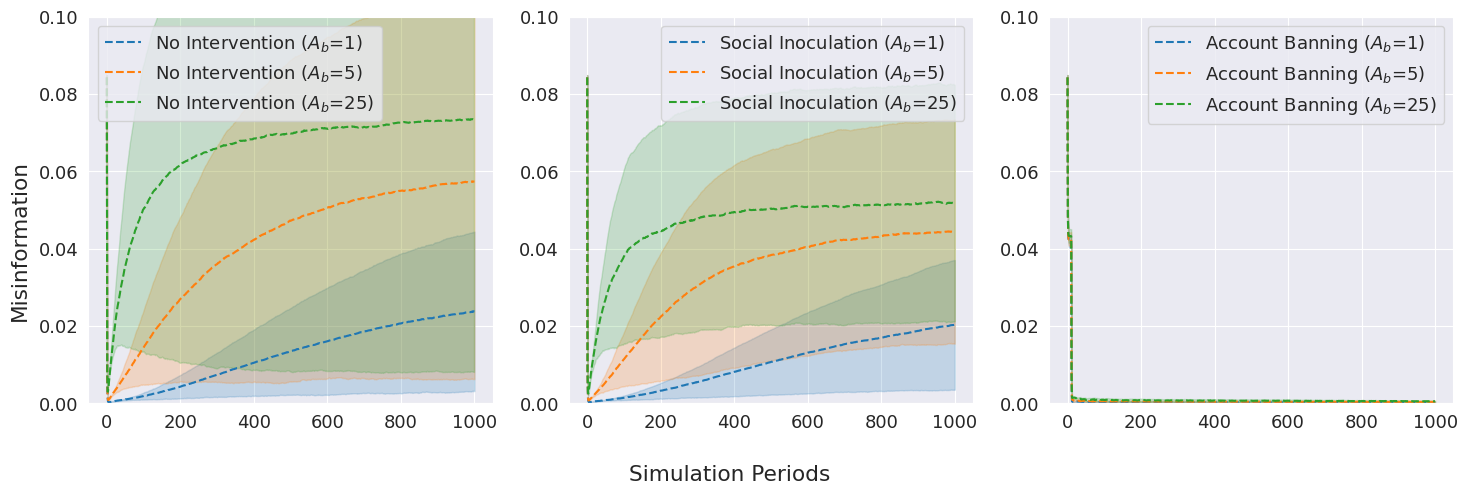

In [10]:

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
x = np.linspace(0, 1000, 1000)

mim1_w1_y = mim1_w1_mdf['misinformation']
mim1_w5_y = mim1_w5_mdf['misinformation']
mim1_w25_y = mim1_w25_mdf['misinformation']

mim2_w1_y = mim2_w1_mdf['misinformation']
mim2_w5_y = mim2_w5_mdf['misinformation']
mim2_w25_y = mim2_w25_mdf['misinformation']

mim3_w1_y = mim3_w1_mdf['misinformation']
mim3_w5_y = mim3_w5_mdf['misinformation']
mim3_w25_y = mim3_w25_mdf['misinformation']


mim1_w1_std = np.std([mdf['misinformation'] for mdf in mim1_w1_mdf_nm], axis=0)
mim1_w5_std = np.std([mdf['misinformation'] for mdf in mim1_w5_mdf_nm], axis=0)
mim1_w25_std = np.std([mdf['misinformation'] for mdf in mim1_w25_mdf_nm], axis=0)

mim2_w1_std = np.std([mdf['misinformation'] for mdf in mim2_w1_mdf_nm], axis=0)
mim2_w5_std = np.std([mdf['misinformation'] for mdf in mim2_w5_mdf_nm], axis=0)
mim2_w25_std = np.std([mdf['misinformation'] for mdf in mim2_w25_mdf_nm], axis=0)

mim3_w1_std = np.std([mdf['misinformation'] for mdf in mim3_w1_mdf_nm], axis=0)
mim3_w5_std = np.std([mdf['misinformation'] for mdf in mim3_w5_mdf_nm], axis=0)
mim3_w25_std = np.std([mdf['misinformation'] for mdf in mim3_w25_mdf_nm], axis=0)


axes[0].plot(x, smooth(mim1_w1_y, 0), '--', label=r'No Intervention ($A_b$=1)')
axes[0].plot(x, smooth(mim1_w5_y, 0), '--', label=r'No Intervention ($A_b$=5)')
axes[0].plot(x, smooth(mim1_w25_y, 0), '--', label=r'No Intervention ($A_b$=25)')

axes[0].fill_between(x, mim1_w1_y - mim1_w1_std, mim1_w1_y + mim1_w1_std, color=palette[0], alpha=0.2)
axes[0].fill_between(x, mim1_w5_y - mim1_w5_std, mim1_w5_y + mim1_w5_std, color=palette[1], alpha=0.2)
axes[0].fill_between(x, mim1_w25_y - mim1_w25_std, mim1_w25_y + mim1_w25_std, color=palette[2], alpha=0.2)

axes[2].plot(x, smooth(mim2_w1_y, 0), '--', label=r'Account Banning ($A_b$=1)')
axes[2].plot(x, smooth(mim2_w5_y, 0), '--', label=r'Account Banning ($A_b$=5)')
axes[2].plot(x, smooth(mim2_w25_y, 0), '--', label=r'Account Banning ($A_b$=25)')

axes[2].fill_between(x, mim2_w1_y - mim2_w1_std, mim2_w1_y + mim2_w1_std, color=palette[0], alpha=0.2)
axes[2].fill_between(x, mim2_w5_y - mim2_w5_std, mim2_w5_y + mim2_w5_std, color=palette[1], alpha=0.2)
axes[2].fill_between(x, mim2_w25_y - mim2_w25_std, mim2_w25_y + mim2_w25_std, color=palette[2], alpha=0.2)


axes[1].plot(x, smooth(mim3_w1_y, 0), '--', label=r'Social Inoculation ($A_b$=1)')
axes[1].plot(x, smooth(mim3_w5_y, 0), '--', label=r'Social Inoculation ($A_b$=5)')
axes[1].plot(x, smooth(mim3_w25_y, 0), '--', label=r'Social Inoculation ($A_b$=25)')


axes[1].fill_between(x, mim3_w1_y - mim3_w1_std, mim3_w1_y + mim3_w1_std, color=palette[0], alpha=0.2)
axes[1].fill_between(x, mim3_w5_y - mim3_w5_std, mim3_w5_y + mim3_w5_std, color=palette[1], alpha=0.2)
axes[1].fill_between(x, mim3_w25_y - mim3_w25_std, mim3_w25_y + mim3_w25_std, color=palette[2], alpha=0.2)

axes[0].set_ylim(0, 0.10)
axes[1].set_ylim(0, 0.10)
axes[2].set_ylim(0, 0.10)


axes[0].legend(loc='best')
axes[1].legend(loc='best')
axes[2].legend(loc='best')

fig.supylabel('Misinformation')
fig.supxlabel('Simulation Periods')
# ax.set_title('polarization changes under \n different intervention methods')


plt.tight_layout()
plt.savefig('data/graphs/exp1_misinf_line.png', dpi=500)


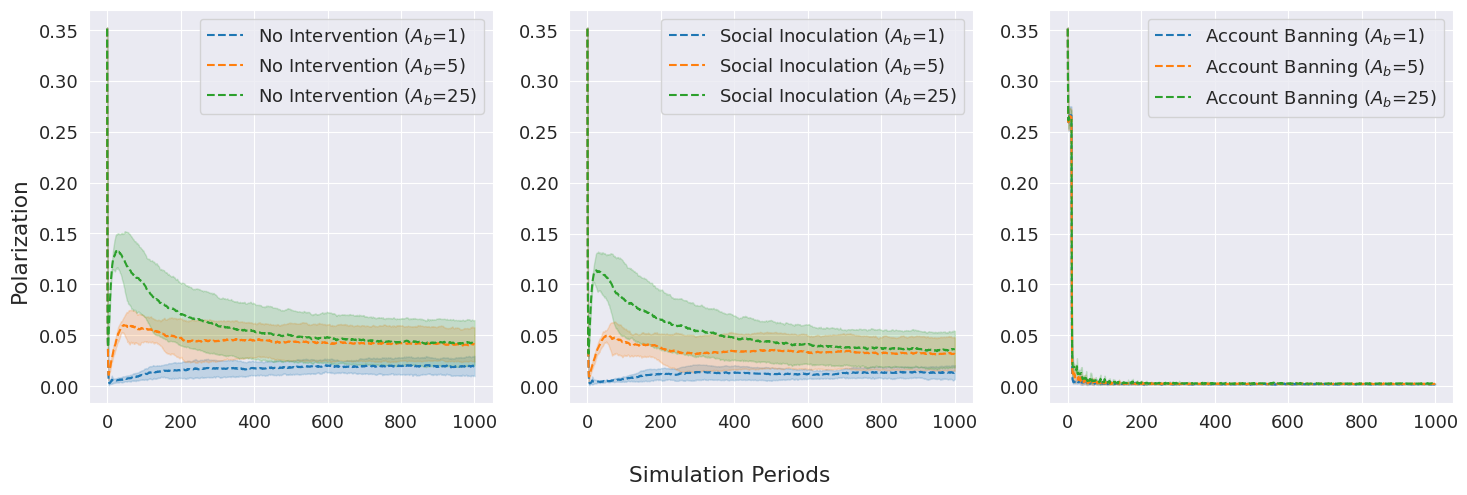

In [11]:

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
x = np.linspace(0, 1000, 1000)

mim1_w1_y = mim1_w1_mdf['polarization']
mim1_w5_y = mim1_w5_mdf['polarization']
mim1_w25_y = mim1_w25_mdf['polarization']

mim2_w1_y = mim2_w1_mdf['polarization']
mim2_w5_y = mim2_w5_mdf['polarization']
mim2_w25_y = mim2_w25_mdf['polarization']

mim3_w1_y = mim3_w1_mdf['polarization']
mim3_w5_y = mim3_w5_mdf['polarization']
mim3_w25_y = mim3_w25_mdf['polarization']


mim1_w1_std = np.std([mdf['polarization'] for mdf in mim1_w1_mdf_nm], axis=0)
mim1_w5_std = np.std([mdf['polarization'] for mdf in mim1_w5_mdf_nm], axis=0)
mim1_w25_std = np.std([mdf['polarization'] for mdf in mim1_w25_mdf_nm], axis=0)

mim2_w1_std = np.std([mdf['polarization'] for mdf in mim2_w1_mdf_nm], axis=0)
mim2_w5_std = np.std([mdf['polarization'] for mdf in mim2_w5_mdf_nm], axis=0)
mim2_w25_std = np.std([mdf['polarization'] for mdf in mim2_w25_mdf_nm], axis=0)

mim3_w1_std = np.std([mdf['polarization'] for mdf in mim3_w1_mdf_nm], axis=0)
mim3_w5_std = np.std([mdf['polarization'] for mdf in mim3_w5_mdf_nm], axis=0)
mim3_w25_std = np.std([mdf['polarization'] for mdf in mim3_w25_mdf_nm], axis=0)


axes[0].plot(x, smooth(mim1_w1_y, 0), '--', label=r'No Intervention ($A_b$=1)')
axes[0].plot(x, smooth(mim1_w5_y, 0), '--', label=r'No Intervention ($A_b$=5)')
axes[0].plot(x, smooth(mim1_w25_y, 0), '--', label=r'No Intervention ($A_b$=25)')

axes[2].plot(x, smooth(mim2_w1_y, 0), '--', label=r'Account Banning ($A_b$=1)')
axes[2].plot(x, smooth(mim2_w5_y, 0), '--', label=r'Account Banning ($A_b$=5)')
axes[2].plot(x, smooth(mim2_w25_y, 0), '--', label=r'Account Banning ($A_b$=25)')



axes[1].plot(x, smooth(mim3_w1_y, 0), '--', label=r'Social Inoculation ($A_b$=1)')
axes[1].plot(x, smooth(mim3_w5_y, 0), '--', label=r'Social Inoculation ($A_b$=5)')
axes[1].plot(x, smooth(mim3_w25_y, 0), '--', label=r'Social Inoculation ($A_b$=25)')


axes[0].fill_between(x, mim1_w1_y - mim1_w1_std, mim1_w1_y + mim1_w1_std, color=palette[0], alpha=0.2)
axes[0].fill_between(x, mim1_w5_y - mim1_w5_std, mim1_w5_y + mim1_w5_std, color=palette[1], alpha=0.2)
axes[0].fill_between(x, mim1_w25_y - mim1_w25_std, mim1_w25_y + mim1_w25_std, color=palette[2], alpha=0.2)

axes[1].fill_between(x, mim3_w1_y - mim3_w1_std, mim3_w1_y + mim3_w1_std, color=palette[0], alpha=0.2)
axes[1].fill_between(x, mim3_w5_y - mim3_w5_std, mim3_w5_y + mim3_w5_std, color=palette[1], alpha=0.2)
axes[1].fill_between(x, mim3_w25_y - mim3_w25_std, mim3_w25_y + mim3_w25_std, color=palette[2], alpha=0.2)

axes[2].fill_between(x, mim2_w1_y - mim2_w1_std, mim2_w1_y + mim2_w1_std, color=palette[0], alpha=0.2)
axes[2].fill_between(x, mim2_w5_y - mim2_w5_std, mim2_w5_y + mim2_w5_std, color=palette[1], alpha=0.2)
axes[2].fill_between(x, mim2_w25_y - mim2_w25_std, mim2_w25_y + mim2_w25_std, color=palette[2], alpha=0.2)


axes[0].legend(loc='best')
axes[1].legend(loc='best')
axes[2].legend(loc='best')

fig.supylabel('Polarization')
fig.supxlabel('Simulation Periods')
# ax.set_title('polarization changes under \n different intervention methods')


plt.tight_layout()
plt.savefig('data/graphs/exp1_pol_line.png', dpi=500)
